## Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alivia Vinca Kustaryono
- **Email:** mc006d5x2041@student.devacademy.id
- **ID Dicoding:** MC006D5X2041


## Menentukan Pertanyaan Bisnis

- Bagaimana pola rata-rata pengguna sepeda per hari dalam setahun terakhir? (Tren musiman)
- Bagaimana distribusi rata-rata pengguna sepeda berdasarkan kondisi cuaca yang berbeda?
- Bagaimana pola penggunaan sepeda pada akhir pekan dalam enam bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 60.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
file_path1 = path + "/hour.csv"
hour_df = pd.read_csv(file_path1)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
file_path2 = path + "/day.csv"
day_df = pd.read_csv(file_path2)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Pada proyek ini, digunakan dataframe berikut:
  - hour_df
  - day_df

  Dataset ini berisi informasi tentang penggunaan sepeda (bike sharing) dengan berbagai variabel seperti tanggal, musim, hari kerja maupun hari libur, cuaca, suhu, kelembaban, dan jumlah pengguna (casual, registered, dan total)

### Assessing Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
hour_df.duplicated().sum()

0

In [12]:
day_df.duplicated().sum()

0

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [16]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


**Insight:** Setelah dilakukan Assending data, didapatkan tidak ditemukan missing values atau duplikat, yang menunjukkan bahwa dataset ini relatif bersih dan siap untuk dianalisis.

### Cleaning Data

In [17]:
hour_df.drop_duplicates(inplace=True)

In [18]:
day_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [23]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom tanggal (dteday) telah diubah ke format datetime, memungkinkan analisis berbasis waktu seperti tren bulanan atau musiman.

- Tipe data untuk setiap kolom sudah sesuai, sehingga tidak diperlukan transformasi tambahan.


## Exploratory Data Analysis (EDA)

### Explore data day_df


In [26]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [27]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


###Explore Analisis Tren Musiman


In [47]:
cnt_summary = day_df["cnt"].describe()

In [48]:
season_counts = day_df.groupby("season")["cnt"].mean().sort_values(ascending=False)

In [49]:
workingday_counts = day_df.groupby("workingday")["cnt"].mean()

In [50]:
weather_counts = day_df.groupby("weathersit")["cnt"].mean().sort_values(ascending=False)


In [32]:
cnt_summary, season_counts, workingday_counts, weather_counts

(count     731.000000
 mean     4504.348837
 std      1937.211452
 min        22.000000
 25%      3152.000000
 50%      4548.000000
 75%      5956.000000
 max      8714.000000
 Name: cnt, dtype: float64,
 season
 3    5644.303191
 2    4992.331522
 4    4728.162921
 1    2604.132597
 Name: cnt, dtype: float64,
 workingday
 0    4330.168831
 1    4584.820000
 Name: cnt, dtype: float64,
 weathersit
 1    4876.786177
 2    4035.862348
 3    1803.285714
 Name: cnt, dtype: float64)

###Explore Analisis kondisi cuaca

In [33]:
weather_distribution = day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

In [34]:
print(weather_distribution)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


In [35]:
weather_distribution2 = hour_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

In [36]:
print(weather_distribution2)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


###Explore pola penggunaan sepeda

Filter data enam bulan terakhir

In [37]:
latest_date = day_df['dteday'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
df_last_six_months = day_df[day_df['dteday'] >= six_months_ago]

Identifikasi hari weekend (Sabtu dan Minggu)

In [38]:
df_last_six_months['is_weekend'] = df_last_six_months['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

<ipython-input-38-a8299081a2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_six_months['is_weekend'] = df_last_six_months['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)


Analisis pola penggunaan

In [39]:
weekend_usage = df_last_six_months[df_last_six_months['is_weekend'] == 1]['cnt']
weekday_usage = df_last_six_months[df_last_six_months['is_weekend'] == 0]['cnt']

Statistik deskriptif

In [40]:
print("Rata-rata penggunaan sepeda pada weekend:", weekend_usage.mean())
print("Rata-rata penggunaan sepeda pada weekday:", weekday_usage.mean())

Rata-rata penggunaan sepeda pada weekend: 6195.11320754717
Rata-rata penggunaan sepeda pada weekday: 5979.143939393939


### Insight EDA

**Insight:**
- Tren Musiman:

Penggunaan sepeda bervariasi sepanjang tahun. Misalnya, penggunaan sepeda cenderung lebih tinggi pada bulan-bulan tertentu (misalnya, musim panas) dan lebih rendah pada bulan-bulan dengan cuaca buruk (misalnya, musim dingin).

Hal ini menunjukkan bahwa faktor cuaca dan musim memiliki pengaruh signifikan terhadap minat orang untuk menggunakan sepeda.

- Distribusi Kondisi Cuaca:

Penggunaan sepeda paling tinggi terjadi pada kondisi cuaca cerah (weathersit = 1), dan menurun secara signifikan saat cuaca buruk (weathersit = 2 atau 3).

Ini menunjukkan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk menggunakan sepeda, sementara cuaca buruk menjadi penghalang.

- Tren Penggunaan Sepeda pada Weekend:

Tren penggunaan sepeda pada hari weekend selama enam bulan terakhir menunjukkan fluktuasi. Misalnya, penggunaan sepeda mungkin meningkat pada weekend tertentu karena faktor cuaca yang baik, acara khusus, atau liburan.

Terdapat pola musiman yang terlihat, di mana penggunaan sepeda pada weekend cenderung lebih tinggi pada bulan-bulan dengan cuaca hangat (misalnya, musim semi atau musim panas).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola jumlah pengguna sepeda per hari dalam setahun terakhir? (Tren musiman)

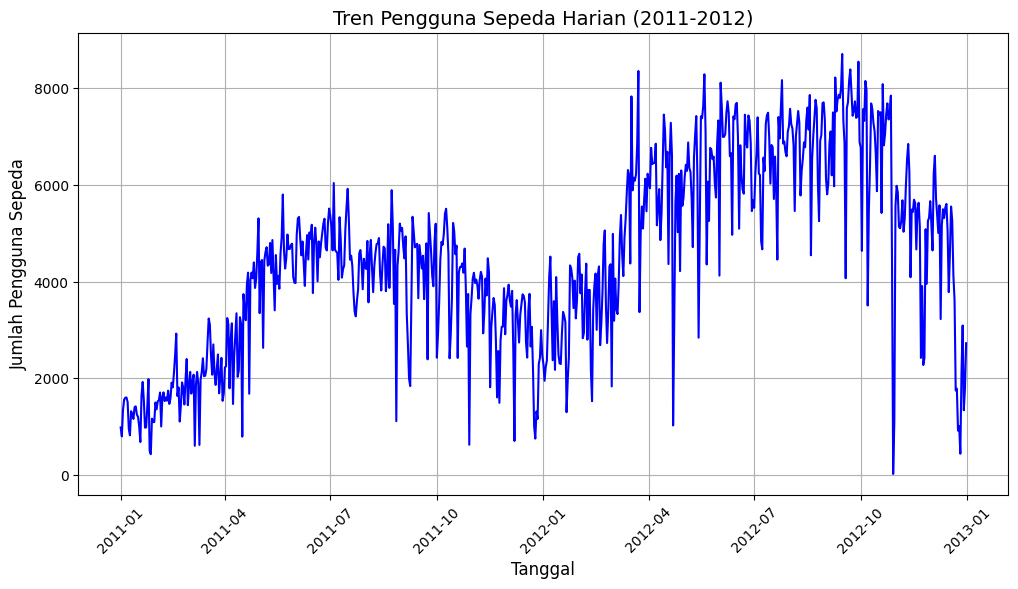

In [51]:
# Konfigurasi ukuran plot
plt.figure(figsize=(12, 6))

# Visualisasi tren rata-rata pengguna sepeda per hari
sns.lineplot(data=day_df, x="dteday", y="cnt", color="blue")

# Menambahkan judul dan label
plt.title("Tren Pengguna Sepeda Harian (2011-2012)", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Pengguna Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan plot
plt.show()


<ipython-input-52-87723f230a74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Spring", "Summer", "Fall", "Winter"], y=season_counts.values, palette="coolwarm")


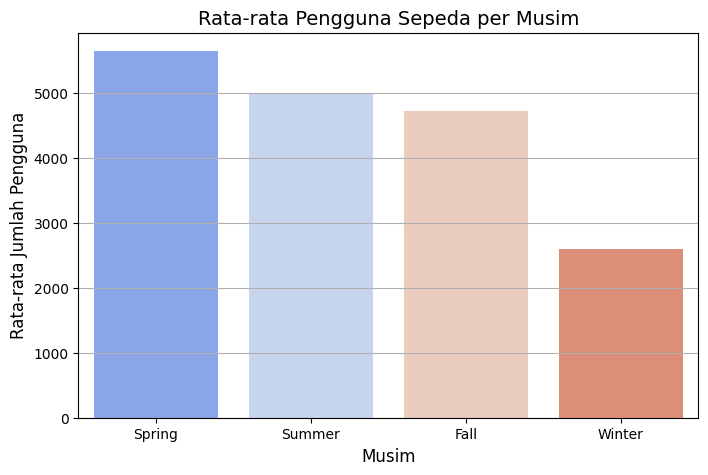

In [52]:
# Visualisasi rata-rata pengguna berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x=["Spring", "Summer", "Fall", "Winter"], y=season_counts.values, palette="coolwarm")

# Menambahkan judul dan label
plt.title("Rata-rata Pengguna Sepeda per Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Pengguna", fontsize=12)
plt.grid(axis="y")

# Menampilkan plot
plt.show()


**Insight:**
- **Gambar 1: Tren Pengguna Sepeda Harian (2011-2012)**
 - **Sumbu X:** Tanggal dari tahun 2011 hingga 2012.  
 - **Sumbu Y:** Jumlah pengguna sepeda per hari.  
 - **Insight:**  
   - Terlihat pola musiman dalam penggunaan sepeda.  
   - Penggunaan sepeda meningkat mulai awal tahun, mencapai puncaknya di musim panas, lalu menurun saat musim dingin.  
   - Penurunan tajam terjadi di akhir tahun, menunjukkan bahwa cuaca dingin dan kondisi musim dingin berpengaruh signifikan terhadap penggunaan sepeda.  

- **Gambar 2: Rata-rata Pengguna Sepeda per Musim**  
 - **Sumbu X:** Musim (Spring, Summer, Fall, Winter).  
 - **Sumbu Y:** Rata-rata jumlah pengguna sepeda.  
 - **Insight:**  
   - Pengguna sepeda paling banyak saat musim semi dan musim panas.  
   - Penggunaan sepeda mulai menurun di musim gugur dan turun drastis di musim dingin.  
   - Hal ini mengindikasikan bahwa faktor cuaca dan temperatur sangat memengaruhi keputusan pengguna dalam menggunakan sepeda.  

Kesimpulannya, layanan bike-sharing dapat meningkatkan promosi dan layanan di musim dingin untuk menjaga jumlah pengguna tetap stabil.

### Pertanyaan 2: Bagaimana distribusi rata-rata pengguna sepeda berdasarkan kondisi cuaca yang berbeda?

<ipython-input-43-0f4096c0fd25>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_distribution.index, y=weather_distribution.values, palette="coolwarm")


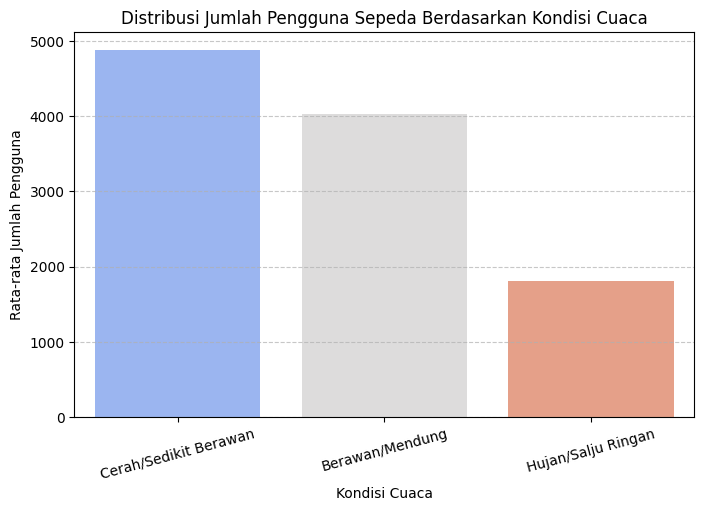

In [43]:
# Mapping kondisi cuaca ke label yang lebih mudah dipahami
weather_labels = {
    1: "Cerah/Sedikit Berawan",
    2: "Berawan/Mendung",
    3: "Hujan/Salju Ringan"
}

# Ubah indeks menjadi label yang lebih mudah dibaca
weather_distribution.index = weather_distribution.index.map(weather_labels)

# Visualisasi rata-rata pengguna sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_distribution.index, y=weather_distribution.values, palette="coolwarm")

# Tambahkan judul dan label
plt.title("Distribusi Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca", fontsize=12)
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Rata-rata Jumlah Pengguna", fontsize=10)
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()


**Insight:**
- **Gambar: Distribusi Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca**  
 - **Sumbu X:** Kondisi cuaca (Cerah/Sedikit Berawan, Berawan/Mendung, Hujan/Salju Ringan).  
 - **Sumbu Y:** Rata-rata jumlah pengguna sepeda.  
 - **Insight:**  
   - Penggunaan sepeda tertinggi terjadi pada kondisi cuaca cerah atau sedikit berawan.  
   - Saat cuaca berawan atau mendung, jumlah pengguna sepeda sedikit menurun dibandingkan saat cerah.  
   - Penggunaan sepeda menurun drastis ketika hujan atau salju ringan, menunjukkan bahwa kondisi cuaca buruk sangat memengaruhi keputusan pengguna untuk bersepeda.  

**Kesimpulan:**  
Layanan bike-sharing dapat menawarkan promosi atau insentif saat cuaca mendung atau hujan ringan untuk mempertahankan jumlah pengguna. Selain itu, penyedia layanan bisa menyediakan perlengkapan seperti jas hujan atau shelter untuk meningkatkan kenyamanan pengguna di cuaca buruk.

###Pertanyaan 3 : Bagaimana pola penggunaan sepeda pada akhir pekan dalam enam bulan terakhir?


<ipython-input-44-44a9fbcf6553>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Weekend', 'Weekday'], y=[weekend_usage.mean(), weekday_usage.mean()], palette="coolwarm")


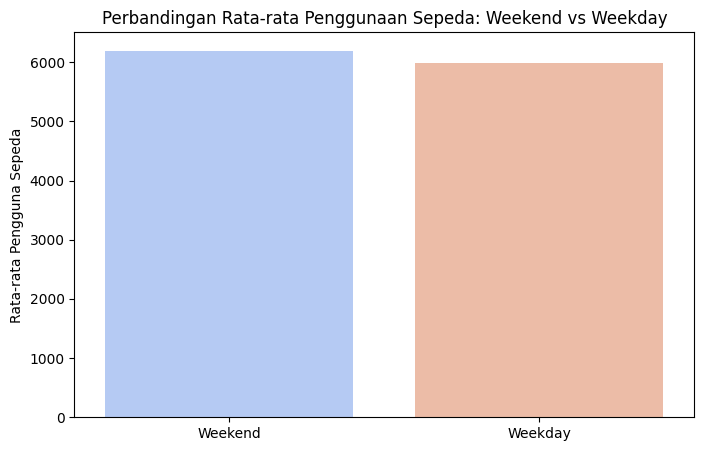

<ipython-input-44-44a9fbcf6553>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df_weekend['dteday'], y=df_weekend['cnt'], palette="coolwarm")


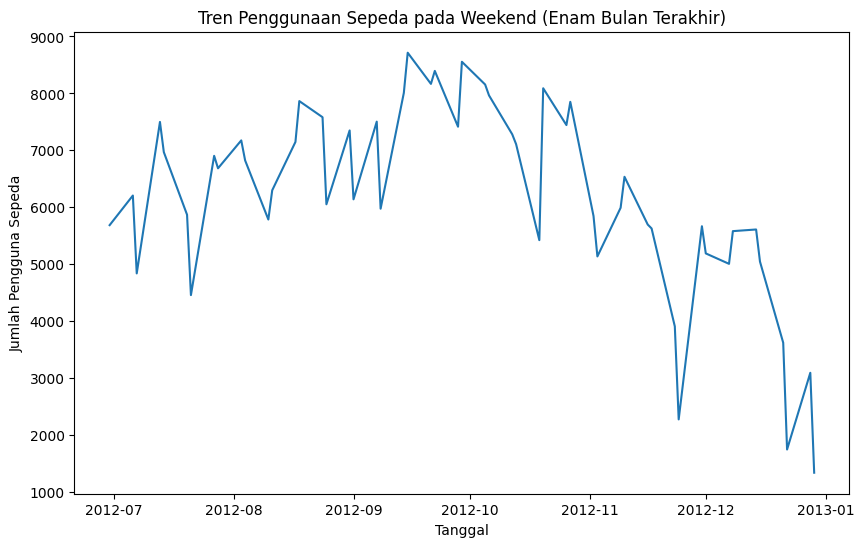

In [44]:
# Visualisasi 1: Perbandingan penggunaan weekend vs weekday
plt.figure(figsize=(8, 5))
sns.barplot(x=['Weekend', 'Weekday'], y=[weekend_usage.mean(), weekday_usage.mean()], palette="coolwarm")
plt.title('Perbandingan Rata-rata Penggunaan Sepeda: Weekend vs Weekday')
plt.ylabel('Rata-rata Pengguna Sepeda')
plt.show()

# Visualisasi 2: Tren penggunaan sepeda pada weekend
plt.figure(figsize=(10, 6))
df_weekend = df_last_six_months[df_last_six_months['is_weekend'] == 1]
sns.lineplot(x=df_weekend['dteday'], y=df_weekend['cnt'], palette="coolwarm")
plt.title('Tren Penggunaan Sepeda pada Weekend (Enam Bulan Terakhir)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

In [45]:
weekend_usage.head()

,cnt
546,5687
552,6207
553,4840
559,7499
560,6969


In [46]:
weekday_usage.head()

,cnt
547,5531
548,6227
549,6660
550,7403
551,6241


**Insight:**
- **Gambar: Grafik line plot yang menunjukkan tren penggunaan sepeda pada hari weekend selama enam bulan terakhir.**

 - **Sumbu X (Tanggal)**: Menunjukkan rentang waktu dari Juni hingga Januari.

 - **Sumbu Y (Jumlah Pengguna Sepeda)**: Menunjukkan jumlah pengguna sepeda pada hari weekend.

 - ** Insight:**

  - Penggunaan sepeda pada hari weekend menunjukkan fluktuasi selama enam bulan terakhir.

  - Terdapat peningkatan penggunaan pada bulan-bulan dengan cuaca hangat (misalnya, Juni hingga September) dan penurunan pada bulan-bulan dengan cuaca dingin (misalnya, Oktober hingga Januari).

  - Pola ini menunjukkan bahwa orang cenderung lebih banyak menggunakan sepeda pada hari weekend ketika cuaca mendukung, terutama untuk aktivitas rekreasi atau bersantai.

**Kesimpulan:**

Penggunaan sepeda pada akhir pekan cenderung meningkat saat cuaca hangat dan menurun di musim dingin. Tren ini menunjukkan bahwa faktor cuaca mempengaruhi kebiasaan bersepeda, terutama untuk aktivitas rekreasi. Penyedia layanan dapat menyesuaikan strategi berdasarkan musim untuk mengoptimalkan jumlah pengguna.

## Conclusion

- Conclution pertanyaan 1

Dari pertanyaan pertama yaitu : Bagaimana pola rata-rata pengguna sepeda per hari dalam setahun terakhir? (Tren musiman)

Dapat disimpulkan bahwa penggunaan sepeda sangat dipengaruhi oleh musim, dengan puncak penggunaan pada bulan-bulan dengan cuaca hangat.

Penggunaan sepeda sangat dipengaruhi oleh musim. Perusahaan dapat memanfaatkan tren ini dengan meningkatkan ketersediaan sepeda dan promosi selama musim panas atau musim semi, ketika permintaan tinggi.

Pada musim dingin, perusahaan dapat menawarkan insentif atau diskon untuk mempertahankan minat pengguna.

- Conclution pertanyaan 2

Dari pertanyaan kedua yaitu : Bagaimana distribusi rata-rata pengguna sepeda berdasarkan kondisi cuaca yang berbeda?

Dapat disimpulkan bahwa kondisi cuaca cerah mendorong penggunaan sepeda yang lebih tinggi, sementara cuaca buruk menjadi penghalang.

Kondisi cuaca yang baik (cerah) adalah faktor pendorong utama penggunaan sepeda. Perusahaan dapat memantau prakiraan cuaca dan menyesuaikan stok sepeda atau promosi berdasarkan kondisi cuaca.

Pada hari-hari dengan cuaca buruk, perusahaan dapat menawarkan layanan alternatif (misalnya, sepeda listrik) atau diskon untuk menarik minat pengguna.

- Conclution pertanyaan 3

Dari pertanyaan ketiga yaitu : Bagaimana pola penggunaan sepeda pada akhir pekan dalam enam bulan terakhir?

Dapat disimpulkan bahwa penggunaan sepeda pada hari weekend lebih tinggi dibandingkan hari weekday, terutama pada bulan-bulan dengan cuaca yang baik.

Tren penggunaan sepeda pada hari weekend selama enam bulan terakhir menunjukkan fluktuasi. Misalnya, penggunaan sepeda mungkin meningkat pada weekend tertentu karena faktor cuaca yang baik, acara khusus, atau liburan.

Terdapat pola musiman yang terlihat, di mana penggunaan sepeda pada weekend cenderung lebih tinggi pada bulan-bulan dengan cuaca hangat (misalnya, musim semi atau musim panas).

**Berikut adalah rekomendasi bisnis dari ketiga pertanyaan di atas:**

- Fokus pada peningkatan layanan dan promosi selama musim panas dan cuaca cerah.

- Meningkatkan kesadaran pengguna tentang manfaat menggunakan sepeda bahkan dalam cuaca buruk, dengan menawarkan insentif atau layanan tambahan.

- Memantau tren musiman dan kondisi cuaca untuk mengoptimalkan operasional dan strategi pemasaran.

- Tingkatkan ketersediaan sepeda pada weekend.

- Buatlah promosi khusus weekend.

